# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом.



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import seaborn as sb # импортируем библиотеку seaborn
import pandas as pd # импортируем библиотеку pandas

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [ ]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [ ]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

          children_debt_count  children_debt_sum  children_debt_result
children                                                              
0                       14091               1063                  7.54
1                        4808                444                  9.23
2                        2052                194                  9.45
3                         330                 27                  8.18
4                          41                  4                  9.76
5                           9                  0                  0.00


,children_debt_count,children_debt_sum,children_debt_result
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


Text(0, 0.5, 'коэф. задолженности')

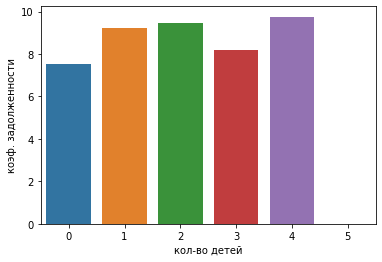

In [ ]:
# создадим отдельный датафрейм для проверки зависимости
children_debt = pd.DataFrame()
# children_debt_count - общее количество заемщиков сгруппированное по количеству детей в семье
children_debt['children_debt_count'] = data.groupby('children')['debt'].count()
# children_debt_sum - общее количество заемщиков имевших задолженность по возврату кредитов
# сгруппированное по количеству детей в семье
children_debt['children_debt_sum'] = data.groupby('children')['debt'].sum()
# children_debt_result - процентное соотношение количества заемщиков имевших задолженность к
# общему кол-ву взятых кредитов сгруппированное по количеству детей в семье
children_debt['children_debt_result'] = round((children_debt['children_debt_sum'] /
                                               children_debt['children_debt_count'] * 100) , 2)
# выводим датафрейм
print(children_debt)
display(children_debt)
# график для наглядности
graph = sb.barplot(x=children_debt.index, y=children_debt['children_debt_result'])
graph.set_xlabel('кол-во детей')
graph.set_ylabel('коэф. задолженности')


**Выводы:**
   
*   Наличие детей в целом увеличивает вероятность возникновения задолженностей по кредитам по отношению к бездетным заемщикам.
*   Разница вероятностей между заемщиками с 2-мя и 3-мя детьми незначительна.
*   Заемщики с 3-мя детьми считаются многодетными и вероятно наличие государственной соц.помощи у этой категории снижает вероятность возникновения задолженостей, но появления 4-го ребенка увеличивает вероятность до максимальной.
*   Количество данных в предоставленной выборке о заемщиках с 5-ю и больше детьми недостаточно и, соответственно эта группа репрезентативна.
*   Количество бездетных заемщиков превышает количество всех заемщиков с детьми (суммарно, вне зависимости от количества детей) более чем в 2 раза.



#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status_count,family_status_sum,family_status_result
family_status,,,
Не женат / не замужем,2796,273,9.76
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62


Text(0.5, 0, 'коэф. задолженности')

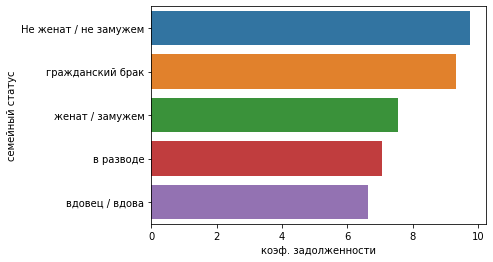

In [ ]:
# ToDo: категории в столбцах 'family_status' и 'family_status_ID' дублируются,
#       поэтому целесообразно сделать декомпозицию таблицы и вывести название семейных
#       статусов из столбца 'family_status' в отдельную таблицу или отдельный словарь


# создадим отдельный датафрейм для проверки зависимости
family_status_debt = pd.DataFrame()
# family_status_sum - общее количество заемщиков сгруппированное по семейным статусам
family_status_debt['family_status_count'] = data.groupby('family_status')['debt'].count()
# family_status_count - общее кол-во заемщиков имевшие кредитные задолженности сгруппированное по семейным статусам
family_status_debt['family_status_sum'] = data.groupby('family_status')['debt'].sum()
# family_status_result - процентное соотношение кол-ва заемщиков имевших задолженность к
# общему кол-ву взятых кредитов сгруппированное по семейным статусам
family_status_debt['family_status_result'] = round(family_status_debt['family_status_sum'] /
                                                   family_status_debt['family_status_count'] * 100, 2 )
# сортируем датафрейм по процентному соотношению
family_status_debt = family_status_debt.sort_values('family_status_result', ascending = False)
# выводим результат
#print(family_status_debt)
display(family_status_debt)
# график для наглядности
graph = sb.barplot(x=family_status_debt['family_status_result'], y=family_status_debt.index)
graph.set_ylabel('семейный статус')
graph.set_xlabel('коэф. задолженности')

**Вывод:**


*   Заемщики не в браке и не регистрирующие свои семейные отношения имеют максимальные показатели вероятности возникновения задолженностей (около 9.5%).
*   У заемщиков находящихся или бывшие в браке в целом эти показатели вероятности ниже. Минимальные показания вероятности у вдовцов, т.е вероятно у людей пожилых (имеет смысл провести проверку категориям возраста)
*   Максимальное количество заемщиков находятся в статусе брака, с вероятностью возникновения задолженности 7.56%  



#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category_count,total_income_category_sum,total_income_category_result
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


Text(0.5, 0, 'коэф. задолженности')

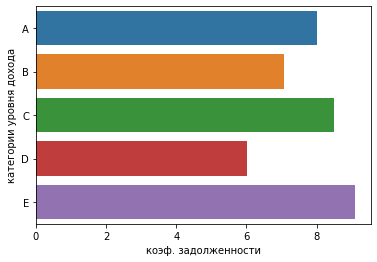

In [ ]:
# Используем ранее созданную категорию уровня дохода
#   'A' - 1000001 и выше
#   'B' - 200001–1000000
#   'C' - 50001–200000
#   'D' - 30001–50000
#   'E' - 0–30000

# создадим отдельный датафрейм для проверки зависимости
income_category_debt = pd.DataFrame()
# total_income_category_count - общее количество заемщиков сгруппированное по категориям дохода
income_category_debt['total_income_category_count'] = data.groupby('total_income_category')['debt'].count()
# total_income_category_sum - общее количество заемщиков имевшие кредитные задолженности
# сгруппированное по категориям дохода
income_category_debt['total_income_category_sum'] = data.groupby('total_income_category')['debt'].sum()
# total_income_category_result - процентное соотношение количества заемщиков имевших задолженность к
# общему кол-ву взятых кредитов сгруппированное по категориям дохода
income_category_debt['total_income_category_result'] = round(data.groupby('total_income_category')['debt'].sum() /
                                                             data.groupby('total_income_category')['debt'].count() * 100, 2)
# Выводим результат
display(income_category_debt)
# график
graph = sb.barplot(x=income_category_debt['total_income_category_result'], y=income_category_debt.index)
graph.set_ylabel('категории уровня дохода')
graph.set_xlabel('коэф. задолженности')

**Вывод:**


*   Суммарно подавляющее вольшинство заемщиков (98.5%) находятся в категориях B и С. Максимальное количество заемщиков из категории 'С' (75% от общего кол-ва) имею доход 50001–200000 руб. Вторая группа по численности заемщиков - категория B (около 23.6%), с доходом 200001–1000000 руб. Остальные группы составляют 1.5% от всего количества заемщиков
*   Заемщики из категории с доходом 50001–200000 имеют на 1.5 % больший показатель вероятности задолженности относительно заемщиков с доходом 200001–1000000 руб. (8.5% и 7% соответственно)



,total_income_category_count,total_income_category_sum,total_income_category_result
total_income_category_qcut,,,
E,4267,344,8.06
D,4266,358,8.39
C,4266,373,8.74
B,4266,358,8.39
A,4266,299,7.01


Text(0.5, 0, 'коэф. задолженности')

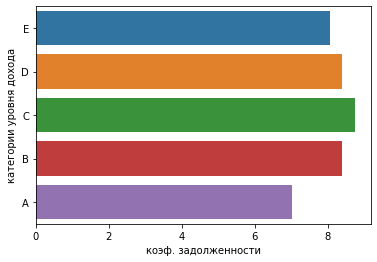

In [ ]:
# разбиваем общий доход на 5 равных диапазонов
#print(pd.qcut(data['total_income'], 5))
# получились следующие категории с диапазонами общего дохода:
# E - (20666.999, 98514.0]
# D - (98514.0, 132113.0]
# C - (132113.0, 161380.0]
# B - (161380.0, 214604.0]
# A - (214604.0, 2265604.0]

# присваиваем в столбце total_income_category_qcut значениям в новые категории
data['total_income_category_qcut'] = pd.qcut(data['total_income'], 5, labels=['E', 'D', 'C', 'B', 'A'])
# создадим новую сводную таблицу
income_category_qcut = pd.DataFrame()
# total_income_category_count - общее количество заемщиков сгруппированное по категориям дохода
income_category_qcut['total_income_category_count'] = data.groupby('total_income_category_qcut')['debt'].count()
# total_income_category_sum - общее количество заемщиков имевшие кредитные задолженности
# сгруппированное по категориям дохода
income_category_qcut['total_income_category_sum'] = data.groupby('total_income_category_qcut')['debt'].sum()
# total_income_category_result - процентное соотношение количества заемщиков имевших задолженность к
# общему кол-ву взятых кредитов сгруппированное по категориям дохода
income_category_qcut['total_income_category_result'] = round(data.groupby('total_income_category_qcut')['debt'].sum() /
                                                             data.groupby('total_income_category_qcut')['debt'].count() *
                                                             100, 2)
# Выводим результат
display(income_category_qcut)
# график
graph = sb.barplot(x=income_category_qcut['total_income_category_result'], y=income_category_qcut.index)
graph.set_ylabel('категории уровня дохода')
graph.set_xlabel('коэф. задолженности')

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

                          purpose_category_sum  purpose_category_count  \
purpose_category                                                         
операции с автомобилем                     400                    4279   
получение образования                      369                    3988   
проведение свадьбы                         183                    2313   
операции с недвижимостью                   780                   10751   

                          purpose_category_result  
purpose_category                                   
операции с автомобилем                       9.35  
получение образования                        9.25  
проведение свадьбы                           7.91  
операции с недвижимостью                     7.26  


Text(0.5, 0, 'коэф. задолженности')

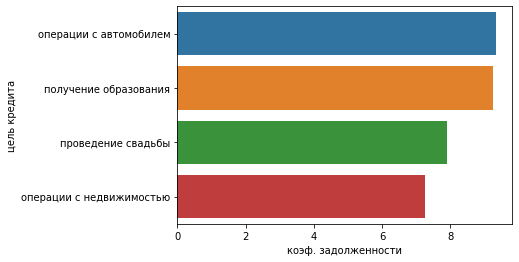

In [ ]:
# создадим датафрейм
purpose_category_debt = pd.DataFrame()
# purpose_category_sum - общее количество заемщиков сгруппированное по целям кредита
purpose_category_debt['purpose_category_sum'] = data.groupby('purpose_category')['debt'].sum()
# purpose_category_count - общее количество заемщиков имевшие кредитные задолженности сгруппированное по целям кредита
purpose_category_debt['purpose_category_count'] = data.groupby('purpose_category')['debt'].count()
# purpose_category_result - процентное соотношение количества заемщиков имевших задолженность к общему кол-ву взятых кредитов сгруппированное по целям кредита
purpose_category_debt['purpose_category_result'] = round(purpose_category_debt['purpose_category_sum'] / purpose_category_debt['purpose_category_count'] * 100 ,2)
purpose_category_debt = purpose_category_debt.sort_values('purpose_category_result', ascending = False)
print(purpose_category_debt)
# график
graph = sb.barplot(x=purpose_category_debt['purpose_category_result'], y=purpose_category_debt.index)
graph.set_ylabel('цель кредита')
graph.set_xlabel('коэф. задолженности')

**Вывод:**


*   Половина кредитов берется с целью оцераций с недвижимостью. Эта же цель имеет минимальный процент вероятности задолженности - 7.26%
*   Вторая группа по количеству взятия кредитов - операции с автомобилем (20,1%) имеет максимальную вероятность возникновения задолженности - 9.35%
*   И почти такую же вероятность имеет цель - получение образования - 9.25%


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

В задаче 4 наличие пропусков было выявлено в двух колонках - 'days_employed' и 'total_income'. Причем количество пропусков одинаково - 2174.
Проверим совпадают ли наличие пропусков в этих двух ячейках одновременно.

In [ ]:
try:
    data_nan = pd.read_csv('/datasets/data.csv')
except:
    data_nan = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

print(len(data_nan.loc[data_nan['days_employed'].isnull() & data_nan['total_income'].isnull()]))

2174


Да, отсутствие данных в этих колонках совпадает - 2174.
Других закономерностей в наличии пропусков не обнаружено.
Скорее всего пропуски возникли вследствии технической ошибки при получении данных.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Данные об общем трудовом стаже в днях (колонка 'days_employed') и ежемесячном  доходе (колонка 'total_income') это количественные переменные. Пропуски в таких переменных заполняют значениями характеризующими состояние выборки. Чтобы заполнить пропуски типичными значениями выборки используют среднее арифметическое или медиана. Причем медиана предпочтительней, так как она исключит сильно выделяющиеся значения в выборке, которые могут влиять на результат.

### Шаг 4: общий вывод.

Общие выводы

*   Наличие и количество детей повышает вероятность возникновений задолженностей
*   У заемщиков находящихся или бывших в браке в целом показатели вероятности ниже.
*   Уровень дохода незначительно влияет на возникновений задолженностей
*   Максимальная погашаемость кредитных займов у заемщиков берущие их для операций с недвижимостью.
В итоге, портрет максимально надежного заемщика - семьи без детей, берущие кредит на операции с недвижимостью.